# Tarea 2 - Miguel Rios Tangarife - Punto 1 

In [29]:
#Librerias que emplearemos
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from IPython.display import Image 
import plotly.figure_factory as ff
import plotly.express as px
%matplotlib inline

In [38]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'rawdata.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/rawdata"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

FileNotFoundError: [Errno 2] No such file or directory: 'data\\rawdata.zip'

In [ ]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'data/faces/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

In [ ]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3)

In [ ]:
X.shape

In [25]:
#Importamos librerias y traemos las imagenes
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = 'C:\\GitHub\\Estadistica3_2023-2\\Tarea2\\faces\\rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

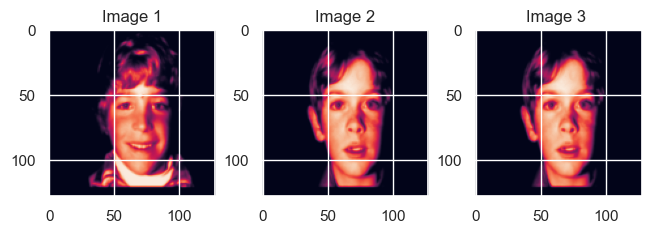

In [14]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3)

In [28]:
#El dataset donde estan todas las fotos,
#donde cada imagen posee 16384 pixeles
X.shape

(785, 16384)

## 1.Calcular la mean face y visualizarla.


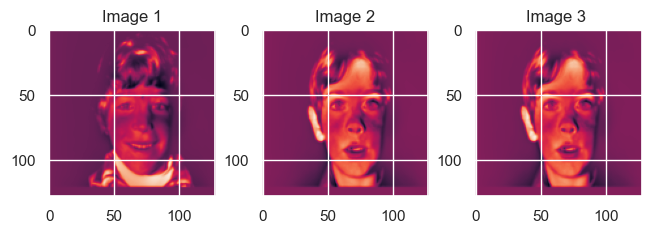

In [19]:
#Centramos los datos al quitar la media de los datos
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

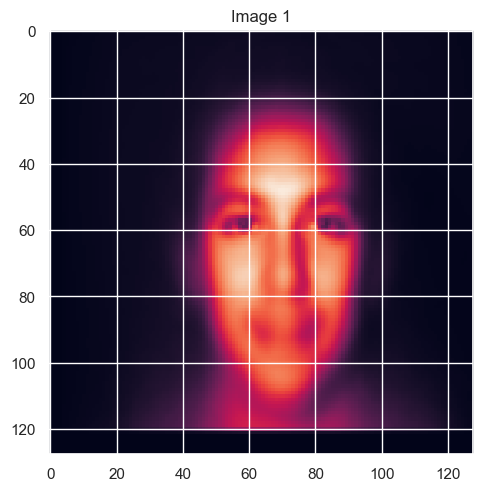

In [21]:
#Mostramos la MeanFace
plot_1_images(X_mean)

In [39]:
#Calculamos matriz de covarianza y eigenvalues y eigen vectors 
#PARA 1 COMPONENTE
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
# images x dim
X_reduced = pca.fit_transform(X_center)
eigen_values = pca.explained_variance_
eigen_faces = pca.components_
print("Varianza explicada 1 componente \n",pca.explained_variance_ratio_)

Varianza explicada 1 componente 
 [0.33274847]


In [40]:
#PARA 5 COMPONENTEs
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
# images x dim
X_reduced = pca.fit_transform(X_center)
eigen_values = pca.explained_variance_
eigen_faces = pca.components_
print("Varianza explicada 5 componente \n",pca.explained_variance_ratio_)

Varianza explicada 5 componente 
 [0.33274847 0.1110011  0.08372751 0.04030686 0.03812797]


In [37]:
#PARA 10 COMPONENTES
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
# images x dim
X_reduced = pca.fit_transform(X_center)
eigen_values = pca.explained_variance_
eigen_faces = pca.components_
print("Varianza explicada 10 componente \n",pca.explained_variance_ratio_)

Varianza explicada 10 componente 
 [0.33274847 0.1110011  0.08372751 0.04030686 0.03812797 0.03312302
 0.02877091 0.01798752 0.0168276  0.01390066]


### Calculemos las componentes que explican el 90% y 99% de la varianza

In [42]:
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

In [43]:
n_components_90 = np.where(explained_variance_ratio_cumulative >= 0.90)[0][0] + 1

In [46]:
n_components_99 = np.where(explained_variance_ratio_cumulative >= 0.99)[0][0] + 1

In [45]:
print("componentes que explican el 90%: ",n_components_90)

componentes que explican el 90%:  61


In [47]:
print("componentes que explican el 99%: ",n_components_99)

componentes que explican el 99%:  354


In [49]:
#PARA 61 COMPONENTES - componentes que explican el 90%
from sklearn.decomposition import PCA
pca = PCA(n_components=61)
# images x dim
X_reduced = pca.fit_transform(X_center)
eigen_values = pca.explained_variance_
eigen_faces = pca.components_
print("Varianza explicada 61 componentes \n",pca.explained_variance_ratio_)

Varianza explicada 61 componentes 
 [0.33274847 0.1110011  0.08372751 0.04030686 0.03812797 0.03312302
 0.02877091 0.01798752 0.01682761 0.01390066 0.0109196  0.01059566
 0.0089818  0.00818248 0.00769876 0.00728995 0.00674225 0.00630761
 0.00580534 0.00549641 0.00509274 0.00501146 0.00467562 0.0045342
 0.00438698 0.00395499 0.00388762 0.0038199  0.00365589 0.00345017
 0.00333627 0.00320959 0.00301461 0.00285292 0.00283855 0.00271706
 0.00261607 0.00253681 0.00239263 0.00231483 0.00223051 0.00214968
 0.00210929 0.00207548 0.0020037  0.00189457 0.0018099  0.00177582
 0.00169326 0.00162678 0.00161658 0.00158152 0.00153903 0.00150565
 0.00145797 0.0014255  0.00139915 0.00136528 0.00131157 0.00130084
 0.00128277]


In [50]:
#PARA 61 COMPONENTES - componentes que explican el 99%
from sklearn.decomposition import PCA
pca = PCA(n_components=354)
# images x dim
X_reduced = pca.fit_transform(X_center)
eigen_values = pca.explained_variance_
eigen_faces = pca.components_
print("Varianza explicada 354 componentes \n",pca.explained_variance_ratio_)

Varianza explicada 354 componentes 
 [3.32748465e-01 1.11001104e-01 8.37275084e-02 4.03068551e-02
 3.81279668e-02 3.31230237e-02 2.87709067e-02 1.79875245e-02
 1.68276055e-02 1.39006623e-02 1.09196027e-02 1.05956622e-02
 8.98180155e-03 8.18247801e-03 7.69875574e-03 7.28995325e-03
 6.74225178e-03 6.30760516e-03 5.80533873e-03 5.49641014e-03
 5.09274402e-03 5.01145706e-03 4.67562101e-03 4.53420248e-03
 4.38698027e-03 3.95499168e-03 3.88762277e-03 3.81990186e-03
 3.65588843e-03 3.45016840e-03 3.33627033e-03 3.20958782e-03
 3.01460685e-03 2.85291836e-03 2.83855387e-03 2.71706221e-03
 2.61607032e-03 2.53680996e-03 2.39263919e-03 2.31483223e-03
 2.23051527e-03 2.14969866e-03 2.10930328e-03 2.07554063e-03
 2.00377017e-03 1.89463082e-03 1.81000415e-03 1.77608598e-03
 1.69347639e-03 1.62726066e-03 1.61687005e-03 1.58250542e-03
 1.53942798e-03 1.50705685e-03 1.46304592e-03 1.42777214e-03
 1.40170955e-03 1.37169141e-03 1.31787629e-03 1.30437645e-03
 1.29268447e-03 1.26082375e-03 1.22557252e-03 1.